<a href="https://colab.research.google.com/github/Soyeon250/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_4%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 오픈소스 기반 데이터 분석 4강 - 데이터 수집


## 4-1 CSV 파일 읽기

In [ ]:
import pandas as pd

## data.csv 파일 읽기
df = pd.read_csv('data.csv', encoding='utf-8', sep =',', header=0,
                 index_col=None, skiprows=None, nrows=None)

print(df)

## 4-2 JSON 파일 읽기



In [ ]:
import json
import pandas as pd

## data.json 파일 출력
with open('data.json', mode='r', encoding='utf-8') as f:
    data = json.load(f)
print(data)

## data.json 파일 DataFrame 읽기
df = pd.read_json('data.json', orient='records', encoding='utf-8')
print(df)

## 4-3 텍스트 파일 읽기 및 데이터 추출

In [ ]:
import re

## 파일(callcenter20250301.log) 오픈 및 읽기
with open('callcenter20250301.log', 'r', encoding='utf-8') as f:
    content = f.read()
## 주민등록번호 패턴 생성(정규표현식)
pattern = re.compile(r'(\d{6})-(\d{7})')

## 주민등록번호 마스킹
masked_content = pattern.sub(r'\1-*******', content)

## 마스킹된 파일(callcenter20250301_masked.log) 오픈 및 쓰기
with open('callcenter20250301_masked.log', mode='w') as f:
    f.write(masked_content)

print("주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.")

## 4-4 Open-Meteo의 무료 날씨 API를 통한 특정 지역 온도 조회

In [ ]:
import requests
import json

url = "https://api.open-meteo.com/v1/forecast?=&=&current=temperature_2m"
params = {
    "latitude": "37.58638333",
    "longitude": "127.0203333",
    "current": "temperature_2m"
}

try:
    ## URL 및 파라미터 전송
    response = requests.get(url, params=params)
    response.raise_for_status()

    ## JSON 데이터 읽기
    data = response.json()

    print("API 응답:", data)
    print("서울시 종로구의 현재 온도는 : {0}{1} 입니다.".format(data['current']['temperature_2m'], data['current_units']['temperature_2m']))

except requests.exceptions.RequestException as e:
    print(f"API 호출 실패: {e}")
except json.JSONDecodeError as e:
    print(f"JSON 파싱 실패: {e}")

## 4-5 Selenium과 lxml을 이용한 웹 스크래핑

In [ ]:
!curl -o google-chrome-stable_current_amd64.deb https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt install ./google-chrome-stable_current_amd64.deb -y
!pip install selenium webdriver_manager

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from lxml import html
import time

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')               # 브라우저 창 없이 실행
chrome_options.add_argument('--no-sandbox')             # 보안모드 비활성화 (Colab 필수)
chrome_options.add_argument('--disable-dev-shm-usage')  # 메모리 부족 방지 (Colab 필수)
chrome_options.add_argument('--window-size=1920x1080')  # 창 크기 설정(가상)
chrome_options.add_argument('--disable-gpu')            # GPU 가속 비활성화 (일부 환경 안정성)
chrome_options.binary_location = "/usr/bin/google-chrome-stable"  # Colab용 크롬 경로 지정

## 드라이버 실행
driver = webdriver.Chrome(options=chrome_options)

## 사이트 접속
url = 'https://professor.knou.ac.kr/jaehwachung/index.do'
driver.get(url)

## 사이트 접속 대기
time.sleep(2)

## 페이지 제목 출력
page_source = driver.page_source
tree = html.fromstring(page_source)

title_text = tree.xpath('//title/text()')
print(title_text)

## 드라이버 종료
driver.quit()


# 실습 시나리오

## 공공데이터 포털 가입 및 데이터 신청

- [https://www.data.go.kr](https://www.data.go.kr)
- 한국환경공단 에어코리아 대기오염정보 데이터 신청

In [ ]:
import requests

## 데이터 수집 url 및 api key 설정
url = 'http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty'
api_key = '04b6bc0ccaeb421f3b7d57f494df536a8e081c7eefcf972beb98b88de1a948bc'

params = {
    'serviceKey': api_key,
    'returnType': 'json',
    'numOfRows': '100',
    'pageNo': '1',
    'sidoName': '경기',
    'ver': '1.0'
}

## 데이터 수집
response = requests.get(url, params=params)

## 호출 성공/실패 출력
print(response.json())


In [ ]:
import requests

def get_year_months():
  year_months = []
  for year in range(2015, 2024+1):
    for month in range(1, 12+1):
      year_months.append(f'{year}{month:02d}')
  return year_months

url = "http://openapi.seoul.go.kr:8088/{5a4e4156566c737935305568525850}/json/energyUseDataSummaryInfo/1/5/{year}/{month}"
api_key = "5a4e4156566c737935305568525850"

params = {
    'serviceKey': api_key,
    'returnType': 'json',
    'numOfRows': '100',
    'pageNo': '1',
    'sidoName': '서울',
    'ver': '1.0'
}

response = requests.get(url, params=params)

if response.status_code == 200:
  print("api 호출 성공")
  print(response.json())
else:
  print(f"API 호출 실패: {response.status_code}")

과제시작

In [ ]:
import requests

def get_year_months():
  year_months = []
  for year in range(2015, 2024+1):
    for month in range(1, 12+1):
      year_months.append(f'{year}{month:02d}')
  return year_months

result_data = []

api_key = "5a4e4156566c737935305568525850"

for year_month in get_year_months():
    year = year_month[:4]
    month = year_month[4:]
    url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/1000/{year}/{month}"

    response = requests.get(url)

    if response.status_code == 200:
        print(f"{year}년 {month}월 api 호출 성공")
        data = response.json()

        if 'energyUseDataSummaryInfo' in data:
            if 'row' in data['energyUseDataSummaryInfo']:
              rows = data['energyUseDataSummaryInfo']['row']

            for item in rows:
              if item.get('MM_TYPE') == '개인':

                  energy_data = {
                      '사용년월': item.get('YEAR') + item.get('MON'),
                      '전기사용량': item.get('EUS'),
                      '가스사용량': item.get('GUS'),
                      '수도사용량': item.get('WUS'),
                      '지역난방사용량': item.get('HUS')
                  }
                  result_data.append(energy_data)
    else:
        print(f"{year}년 {month}월 API 호출 실패: {response.status_code}")

예시코드 결과

In [ ]:
import requests

url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/5/2015/01"
api_key = "5a4e4156566c737935305568525850"

response = requests.get(url)

if response.status_code == 200:
    print("api 호출 성공")
    print(response.json())
else:
    print(f"API 호출 실패: {response.status_code}")


api 호출 성공
{'energyUseDataSummaryInfo': {'list_total_count': 7, 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': [{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}, {'YEAR': '2015', 'MON': '01', 'MM_TYPE': '학교', 'CNT': '1382', 'EUS': '134955565', 'EUS1': '128707423', 'EUS2': '145561511', 'ECO2_1': '-2178902', 'ECO2_2': '-923854.448', 'GUS': '9107197', 'GUS1': '8410968', 'GUS2': '10745416', 'GCO2_1': '-470995', 'GCO2_2': '-1055028.8', 'WUS': '2075819.2', 'WUS1': '2097433.

In [ ]:

import pandas as pd

data = result_data

df = pd.DataFrame(data)
df

## DataFrame 인덱스 출력
print(df.index)

## DataFrame 컬럼 출력
print(df.columns)

## DataFrame 행 출력
print(df.values.tolist())
print(df.values)

## DataFrame 값 출력
print(df.values.flatten())

RangeIndex(start=0, stop=0, step=1)
RangeIndex(start=0, stop=0, step=1)
[]
[]
[]


In [ ]:
import requests
import pandas as pd

def get_year_months():
  year_months = []
  for year in range(2015, 2024+1):
    for month in range(1, 12+1):
      year_months.append(f'{year}{month:02d}')
  return year_months

result_data = []

api_key = "5a4e4156566c737935305568525850"

for year_month in get_year_months():
    year = year_month[:4]
    month = year_month[4:]
    url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/1000/{year}/{month}"

    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()

        if 'energyUseDataSummaryInfo' in data:
            if 'row' in data['energyUseDataSummaryInfo']:
              rows = data['energyUseDataSummaryInfo']['row']

            for item in rows:
              if item.get('MM_TYPE') == '개인':

                  energy_data = {
                      '사용년월': item.get('YEAR') + item.get('MON'),
                      '전기사용량': item.get('EUS'),
                      '가스사용량': item.get('GUS'),
                      '수도사용량': item.get('WUS'),
                      '지역난방사용량': item.get('HUS')
                  }
                  result_data.append(energy_data)
    else:
        print(f"{year}년 {month}월 API 호출 실패: {response.status_code}")

df = pd.DataFrame(result_data)

# DataFrame 기본 정보
df.info()
# DataFrame 상위 5개 미리보기
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   사용년월     120 non-null    object
 1   전기사용량    120 non-null    object
 2   가스사용량    120 non-null    object
 3   수도사용량    120 non-null    object
 4   지역난방사용량  120 non-null    object
dtypes: object(5)
memory usage: 4.8+ KB
     사용년월      전기사용량     가스사용량         수도사용량       지역난방사용량
0  201501  193784708  59133720  12819757.886  22740838.937
1  201502  189974230  56487358  12656888.218  18793320.213
2  201503  175215719  49984873  12655474.249  13826348.508
3  201504  183891769  37306841  12954773.246   5836002.885
4  201505  177289769  22060892  13086734.214   1320895.801


In [ ]:
import requests
import pandas as pd

def get_year_months():
  year_months = []
  for year in range(2015, 2024+1):
    for month in range(1, 12+1):
      year_months.append(f'{year}{month:02d}')
  return year_months

result_data = []

api_key = "5a4e4156566c737935305568525850"

for year_month in get_year_months():
    year = year_month[:4]
    month = year_month[4:]
    url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/1000/{year}/{month}"

    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()

        if 'energyUseDataSummaryInfo' in data:
            if 'row' in data['energyUseDataSummaryInfo']:
              rows = data['energyUseDataSummaryInfo']['row']

            for item in rows:
              if item.get('MM_TYPE') == '개인':

                  energy_data = {
                      '사용년월': item.get('YEAR') + item.get('MON'),
                      '전기사용량': item.get('EUS'),
                      '가스사용량': item.get('GUS'),
                      '수도사용량': item.get('WUS'),
                      '지역난방사용량': item.get('HUS')
                  }
                  result_data.append(energy_data)
    else:
        print(f"{year}년 {month}월 API 호출 실패: {response.status_code}")

df = pd.DataFrame(result_data)

# DataFrame 기본 정보
df.info()
# DataFrame 상위 5개 미리보기
print(df.head())

# 'year' 컬럼 추가: '사용년월' 문자열의 앞 4글자를 잘라와서 만듭니다.
df['year'] = df['사용년월'].str[:4]

# 계절 구분을 위한 함수 정의
def get_season(month):
    if 3 <= month <= 5:
        return '봄'
    elif 6 <= month <= 8:
        return '여름'
    elif 9 <= month <= 11:
        return '가을'
    else: # 12, 1, 2월
        return '겨울'

#  'season' 컬럼 추가
# '사용년월'의 뒤 2글자를 잘라 'month' 임시 컬럼을 만듭니다. (숫자로 변환)
df['month'] = df['사용년월'].str[4:].astype(int)
# 'month' 컬럼의 각 값에 get_season 함수를 적용하여 'season' 컬럼을 만듭니다.
df['season'] = df['month'].apply(get_season)

# 변환 결과 확인 (불필요한 'month' 컬럼은 제외하고 출력)
print("\n--- ['year', 'season' 컬럼 추가 결과] ---")
print(df[['사용년월', 'year', 'season']].head())

# (선택 사항) 임시로 사용한 'month' 컬럼 삭제
df = df.drop(columns=['month'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   사용년월     120 non-null    object
 1   전기사용량    120 non-null    object
 2   가스사용량    120 non-null    object
 3   수도사용량    120 non-null    object
 4   지역난방사용량  120 non-null    object
dtypes: object(5)
memory usage: 4.8+ KB
     사용년월      전기사용량     가스사용량         수도사용량       지역난방사용량
0  201501  193784708  59133720  12819757.886  22740838.937
1  201502  189974230  56487358  12656888.218  18793320.213
2  201503  175215719  49984873  12655474.249  13826348.508
3  201504  183891769  37306841  12954773.246   5836002.885
4  201505  177289769  22060892  13086734.214   1320895.801

--- ['year', 'season' 컬럼 추가 결과] ---
     사용년월  year season
0  201501  2015     겨울
1  201502  2015     겨울
2  201503  2015      봄
3  201504  2015      봄
4  201505  2015      봄


과제 최종

In [7]:
import requests

def get_year_months():
  year_months = []
  for year in range(2015, 2024+1):
    for month in range(1, 12+1):
      year_months.append(f'{year}{month:02d}')
  return year_months

result_data = []

api_key = "5a4e4156566c737935305568525850"

for year_month in get_year_months():
    year = year_month[:4]
    month = year_month[4:]
    url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/1000/{year}/{month}"

    response = requests.get(url)

    if response.status_code == 200:
        print("api 호출 성공")
        data = response.json()

        if 'energyUseDataSummaryInfo' in data:
            if 'row' in data['energyUseDataSummaryInfo']:
              rows = data['energyUseDataSummaryInfo']['row']

            for item in rows:
              if item.get('MM_TYPE') == '개인':

                  energy_data = {
                      '전기': item.get('EUS'),
                      '가스': item.get('GUS'),
                      '수도': item.get('WUS'),
                      '지역난방': item.get('HUS')
                  }
                  result_data.append(energy_data)
                  print(energy_data)

    else:
        print(f"API 호출 실패: {response.status_code}")

api 호출 성공
{'전기사용량': '193784708', '가스사용량': '59133720', '수도사용량': '12819757.886', '지역난방사용량': '22740838.937'}
api 호출 성공
{'전기사용량': '189974230', '가스사용량': '56487358', '수도사용량': '12656888.218', '지역난방사용량': '18793320.213'}
api 호출 성공
{'전기사용량': '175215719', '가스사용량': '49984873', '수도사용량': '12655474.249', '지역난방사용량': '13826348.508'}
api 호출 성공
{'전기사용량': '183891769', '가스사용량': '37306841', '수도사용량': '12954773.246', '지역난방사용량': '5836002.885'}
api 호출 성공
{'전기사용량': '177289769', '가스사용량': '22060892', '수도사용량': '13086734.214', '지역난방사용량': '1320895.801'}
api 호출 성공
{'전기사용량': '186073153', '가스사용량': '12677645', '수도사용량': '14241651.402', '지역난방사용량': '294312.634'}
api 호출 성공
{'전기사용량': '165114568', '가스사용량': '8893640', '수도사용량': '12083879.038', '지역난방사용량': '702863.645'}
api 호출 성공
{'전기사용량': '242000479', '가스사용량': '7619018', '수도사용량': '15164553.742', '지역난방사용량': '460288.965'}
api 호출 성공
{'전기사용량': '207540868', '가스사용량': '6518422', '수도사용량': '14419078.727', '지역난방사용량': '305710.728'}
api 호출 성공
{'전기사용량': '186473958', '가스사용량': '8924018', '수도사용량

In [13]:
import requests
import pandas as pd

def get_year_months():
  year_months = []
  for year in range(2015, 2024+1):
    for month in range(1, 12+1):
      year_months.append(f'{year}{month:02d}')
  return year_months

result_data = []

api_key = "5a4e4156566c737935305568525850"

for year_month in get_year_months():
    year = year_month[:4]
    month = year_month[4:]
    url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/1000/{year}/{month}"

    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()

        if 'energyUseDataSummaryInfo' in data:
            if 'row' in data['energyUseDataSummaryInfo']:
              rows = data['energyUseDataSummaryInfo']['row']

            for item in rows:
              if item.get('MM_TYPE') == '개인':

                  energy_data = {
                      '전기': item.get('EUS'),
                      '가스': item.get('GUS'),
                      '수도': item.get('WUS'),
                      '지역난방': item.get('HUS')
                  }
                  result_data.append(energy_data)

    else:
        print(f"API 호출 실패: {response.status_code}")

df = pd.DataFrame(result_data)

# DataFrame 기본 정보
df.info()
# DataFrame 상위 5개 미리보기
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   전기사용량    120 non-null    object
 1   가스사용량    120 non-null    object
 2   수도사용량    120 non-null    object
 3   지역난방사용량  120 non-null    object
dtypes: object(4)
memory usage: 3.9+ KB


,전기사용량,가스사용량,수도사용량,지역난방사용량
0,193784708,59133720,12819757.886,22740838.937
1,189974230,56487358,12656888.218,18793320.213
2,175215719,49984873,12655474.249,13826348.508
3,183891769,37306841,12954773.246,5836002.885
4,177289769,22060892,13086734.214,1320895.801


In [15]:
import requests
import pandas as pd

def get_year_months():
  year_months = []
  for year in range(2015, 2024+1):
    for month in range(1, 12+1):
      year_months.append(f'{year}{month:02d}')
  return year_months

result_data = []

api_key = "5a4e4156566c737935305568525850"

for year_month in get_year_months():
    year = year_month[:4]
    month = year_month[4:]
    url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/1000/{year}/{month}"

    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()

        if 'energyUseDataSummaryInfo' in data:
            if 'row' in data['energyUseDataSummaryInfo']:
              rows = data['energyUseDataSummaryInfo']['row']

            for item in rows:
              if item.get('MM_TYPE') == '개인':

                  energy_data = {
                      'YEAR': item.get('YEAR'),
                      'MON': item.get('MON'),
                      '전기': item.get('EUS'),
                      '가스': item.get('GUS'),
                      '수도': item.get('WUS'),
                      '지역난방': item.get('HUS')
                  }
                  result_data.append(energy_data)

    else:
        print(f"API 호출 실패: {response.status_code}")

df = pd.DataFrame(result_data)

# 연도(year) 컬럼 생성
df['연도'] = df['YEAR']

# 계절(season) 컬럼 생성
def get_season(month):
    if 3 <= month <= 5: return '봄'
    elif 6 <= month <= 8: return '여름'
    elif 9 <= month <= 11: return '가을'
    else: return '겨울'
df['계절'] = df['MON'].astype(int).apply(get_season)

df = df.drop(columns=['YEAR', 'MON'])

# 변환 결과 확인
df.head()


,전기사용량,가스사용량,수도사용량,지역난방사용량,연도,계절
0,193784708,59133720,12819757.886,22740838.937,2015,겨울
1,189974230,56487358,12656888.218,18793320.213,2015,겨울
2,175215719,49984873,12655474.249,13826348.508,2015,봄
3,183891769,37306841,12954773.246,5836002.885,2015,봄
4,177289769,22060892,13086734.214,1320895.801,2015,봄


In [20]:
# 한글 처리를 위한 matplotlib 설정 (1)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [1]:
# 한글 처리를 위한 matplotlib 설정 (2)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

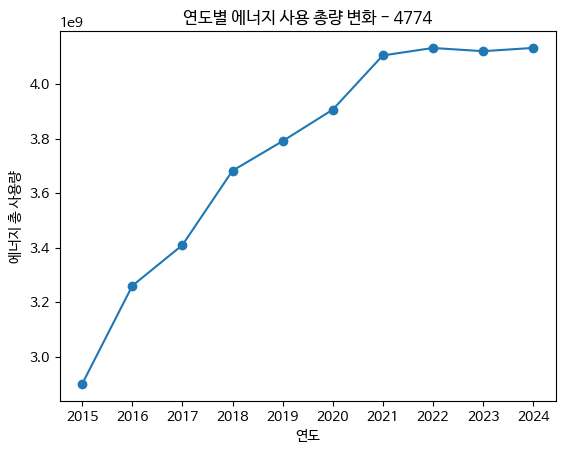

In [10]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

def get_year_months():
  year_months = []
  for year in range(2015, 2024+1):
    for month in range(1, 12+1):
      year_months.append(f'{year}{month:02d}')
  return year_months

result_data = []

api_key = "5a4e4156566c737935305568525850"

for year_month in get_year_months():
    year = year_month[:4]
    month = year_month[4:]
    url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/1000/{year}/{month}"

    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()

        if 'energyUseDataSummaryInfo' in data:
            if 'row' in data['energyUseDataSummaryInfo']:
              rows = data['energyUseDataSummaryInfo']['row']

            for item in rows:
              if item.get('MM_TYPE') == '개인':

                  energy_data = {
                      'YEAR': item.get('YEAR'),
                      'MON': item.get('MON'),
                      '전기': item.get('EUS'),
                      '가스': item.get('GUS'),
                      '수도': item.get('WUS'),
                      '지역난방': item.get('HUS')
                  }
                  result_data.append(energy_data)

    else:
        print(f"API 호출 실패: {response.status_code}")

df = pd.DataFrame(result_data)

# 연도(year) 컬럼 생성
df['연도'] = df['YEAR']

# 계절(season) 컬럼 생성
def get_season(month):
    if 3 <= month <= 5: return '봄'
    elif 6 <= month <= 8: return '여름'
    elif 9 <= month <= 11: return '가을'
    else: return '겨울'
df['계절'] = df['MON'].astype(int).apply(get_season)

df = df.drop(columns=['YEAR', 'MON'])

energy_cols = ['전기사용량', '가스사용량', '수도사용량', '지역난방사용량']

df[energy_cols] = df[energy_cols].apply(pd.to_numeric)
df['총사용량'] = df[energy_cols].sum(axis=1)

yearly_totals = df.groupby('연도')['총사용량'].sum()

plt.plot(yearly_totals.index, yearly_totals.values, marker='o')

# 그래프 제목 및 축 이름 설정
plt.title('연도별 에너지 사용 총량 변화 - 4774')
plt.xlabel('연도')
plt.ylabel('에너지 총 사용량')

plt.show()